In [4]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage
import pandas as pd
import pickle
import ast
import json


Carreguem dades

In [5]:
casos_pkl=pd.read_pickle('../casos.pkl')

llibres_pkl = pd.read_pickle('../llibres.pkl')

In [6]:
#obtenim vectors
#vectors = [cas.vector for cas in casos_pkl]
vectors = list(casos_pkl.vector)
vectors_llibres = list(llibres_pkl.vector)

In [8]:
vectors

[array([-1.    , -1.    , -1.    , -1.    , -1.    ,  1.    , -1.    ,
        -1.    , -1.    , -1.    , -1.    , -1.    , -1.    , -1.    ,
        -1.    , -1.    , -1.    , -1.    , -1.    , -1.    , -1.    ,
        -1.    , -1.    , -1.    , -1.    , -1.    , -1.    , -1.    ,
        -1.    , -1.    , -1.    , -1.    , -1.    , -1.    , -1.    ,
        -1.    , -1.    , -1.    , -1.    , -0.0857, -0.0857, -0.8286,
        -1.    , -1.    , -1.    , -1.    , -1.    , -1.    , -1.    ,
        -1.    , -1.    , -1.    , -1.    , -1.    , -1.    , -1.    ,
        -1.    , -1.    , -1.    ,  1.    , -1.    ,  0.2   , -0.2   ,
        -1.    , -1.    , -1.    , -1.    ,  0.0286, -1.    , -0.0286,
        -0.8286,  0.8286,  0.0857, -1.    , -0.0857, -1.    ,  1.    ,
        -0.6571, -1.    ,  0.6571, -0.3143,  0.3143, -1.    ,  0.2783,
        -0.2869]),
 array([-0.9091, -0.9091, -0.9091, -0.9091, -0.9091,  1.    , -0.9091,
        -0.9091, -0.9091, -0.9091, -0.9091, -0.9091, -0.90

### Cluster aglomeratiu

Veiem la distribució de les dades en un cluster aglomeratiu

/Users/ruthparajo/Library/Python/3.9/lib/python/site-packages/scipy/cluster/hierarchy.py:833: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


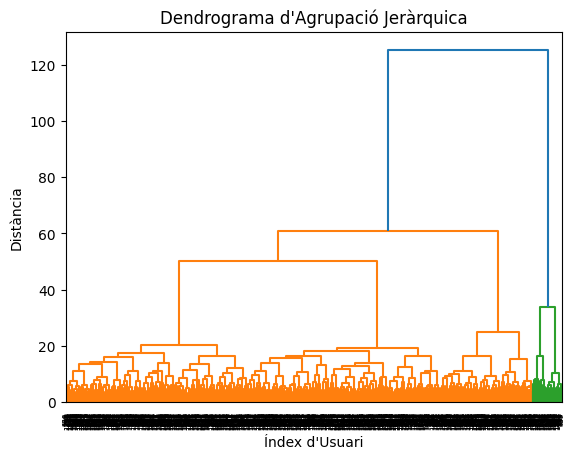

In [9]:
# Calcular la matriu de distàncies
distàncies = pdist(vectors, metric='euclidean')

# Convertir la matriu de distàncies a una matriu quadrada
matriu_distàncies = squareform(distàncies)

# Aplicar l'algoritme d'Agrupació Jeràrquica
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0)  # Trieu el llindar de distància adequat
etiquetes = model.fit_predict(matriu_distàncies)

# Visualitzar el dendrograma
enllaços = linkage(distàncies, method='ward')
dendrogram(enllaços, labels=range(len(vectors)), orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrograma d\'Agrupació Jeràrquica')
plt.xlabel("Índex d'Usuari")
plt.ylabel('Distància')
plt.show()

In [4]:
# Calcular la matriu de distàncies
distàncies_l = pdist(vectors_llibres, metric='euclidean')

# Convertir la matriu de distàncies a una matriu quadrada
matriu_distàncies_l = squareform(distàncies_l)

# Aplicar l'algoritme d'Agrupació Jeràrquica
model_l = AgglomerativeClustering(n_clusters=None, distance_threshold=0)  # Trieu el llindar de distància adequat
etiquetes_l = model_l.fit_predict(matriu_distàncies_l)

# Visualitzar el dendrograma
enllaços_l = linkage(distàncies_l, method='ward')

/Users/ucemarc/.pyenv/versions/3.10.4/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


ValueError: Dimensions of Z and labels must be consistent.

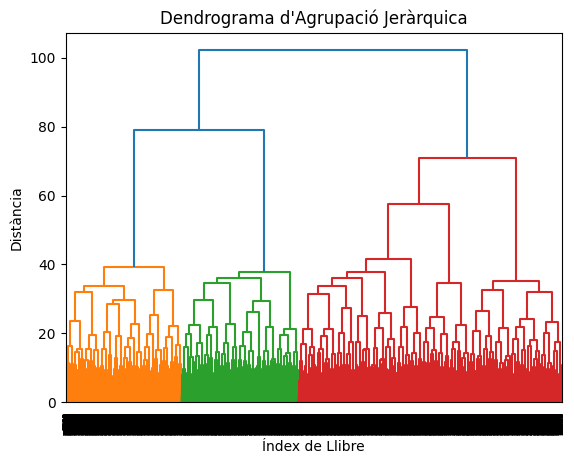

In [6]:
# Visualitzar el dendrograma
dendrogram(enllaços_l, labels=range(len(vectors_llibres)), orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrograma d\'Agrupació Jeràrquica')
plt.xlabel("Índex de Llibre")
plt.ylabel('Distància')
plt.show()

/Users/ruthparajo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/ruthparajo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/ruthparajo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/ruthparajo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/ruthparajo/Library/Python/3.9/lib/python/site-packages/sk

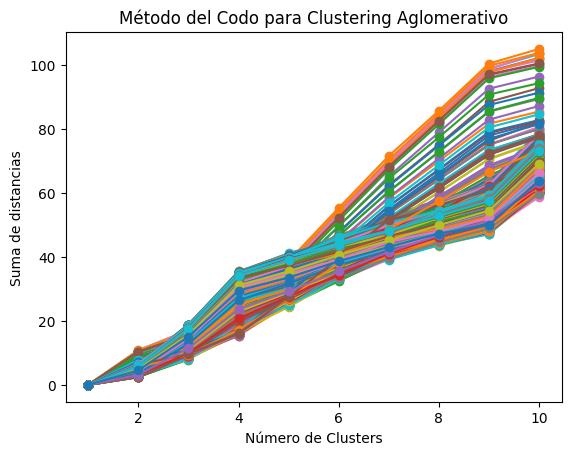

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances

distance_matrix = pairwise_distances(vectors, metric='euclidean')

# Método del codo para clustering aglomerativo
wcss = []
for i in range(1, 11):
    model = AgglomerativeClustering(n_clusters=i, affinity='precomputed', linkage='average')
    labels = model.fit_predict(matriu_distàncies)
    wcss.append(sum(np.min(matriu_distàncies[:, labels == j], axis=1) for j in range(i)))

# Graficar la curva del codo
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método del Codo para Clustering Aglomerativo')
plt.xlabel('Número de Clusters')
plt.ylabel('Suma de distancias')
plt.show()


In [19]:
#decidim el nombre òptim de clusters
model_clustering = AgglomerativeClustering(n_clusters=4)
clusters = model_clustering.fit_predict(vectors)
#casos['cluster'] = clusters

In [20]:
#guardem el model per predir posteriorment
with open('model_clustering.pkl', 'wb') as archivo:
    pickle.dump(model_clustering, archivo)

### Provem kmeans

Modelo con 1 clusters
Modelo con 2 clusters
Modelo con 3 clusters
Modelo con 4 clusters
Modelo con 5 clusters
Modelo con 6 clusters
Modelo con 7 clusters
Modelo con 8 clusters
Modelo con 9 clusters
Modelo con 10 clusters


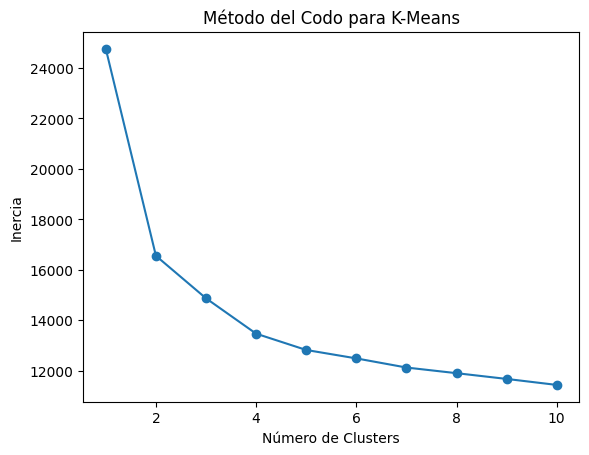

In [7]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    print(f"Modelo con {i} clusters")
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(vectors)
    wcss.append(kmeans.inertia_)

# Graficar la curva del codo
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método del Codo para K-Means')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.show()

In [51]:
def calculate_optimal_k(inertia, k_range):
    """
    Calcula el valor óptimo de K utilizando el método del codo automatizado.
    :param inertia: Lista de valores de inercia para diferentes valores de K.
    :param k_range: Rango de valores de K considerados.
    :return: Valor óptimo de K.
    """
    # Coordenadas del primer y último punto
    p1 = np.array([k_range[0], inertia[0]])
    p2 = np.array([k_range[-1], inertia[-1]])

    # Distancia de cada punto a la línea
    distances = []
    for k, iner in zip(k_range, inertia):
        pk = np.array([k, iner])
        line_vec = p2 - p1
        point_vec = pk - p1
        distance = np.abs(np.cross(line_vec, point_vec)) / np.linalg.norm(line_vec)
        distances.append(distance)

    # Encontrar el índice del valor máximo de la distancia
    optimal_k_index = np.argmax(distances)
    return k_range[optimal_k_index]

In [8]:
from sklearn.cluster import KMeans

wcss = []
k_range = range(1, 21)
for i in k_range:
    print(f"Modelo con {i} clusters")
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(vectors_llibres)
    wcss.append(kmeans.inertia_)

Modelo con 1 clusters
Modelo con 2 clusters
Modelo con 3 clusters
Modelo con 4 clusters
Modelo con 5 clusters
Modelo con 6 clusters
Modelo con 7 clusters
Modelo con 8 clusters
Modelo con 9 clusters
Modelo con 10 clusters
Modelo con 11 clusters
Modelo con 12 clusters
Modelo con 13 clusters
Modelo con 14 clusters
Modelo con 15 clusters
Modelo con 16 clusters
Modelo con 17 clusters
Modelo con 18 clusters
Modelo con 19 clusters
Modelo con 20 clusters


El valor óptimo de K es 5


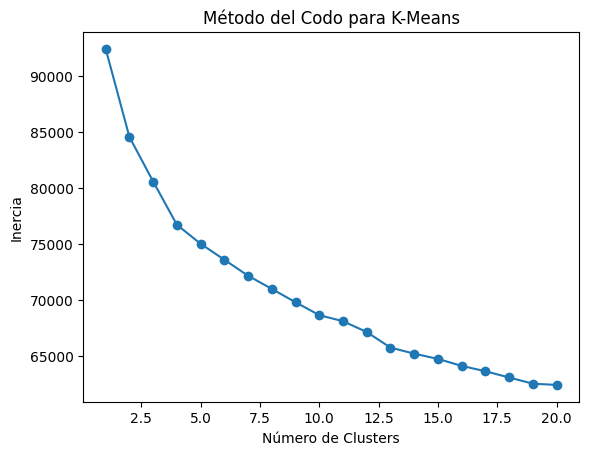

In [9]:
optimal_k = calculate_optimal_k(wcss, k_range)
print(f"El valor óptimo de K es {optimal_k}")

# Graficar la curva del codo
plt.plot(k_range, wcss, marker='o')
plt.title('Método del Codo para K-Means')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.show()

In [10]:
kmeans_ll = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
clusters_ll = kmeans_ll.fit_predict(vectors_llibres)
llibres_pkl['cluster'] = clusters_ll

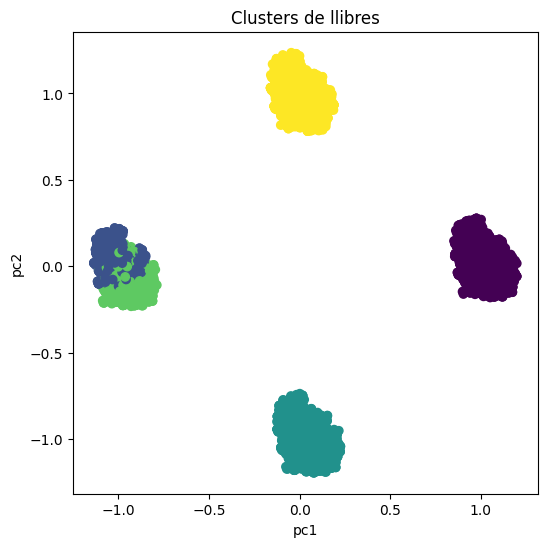

In [22]:
# View the cluster assignments with a PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(vectors_llibres)
principalDf = pd.DataFrame(data=principalComponents, columns=['pc1', 'pc2'])
principalDf['cluster'] = clusters_ll

# Plot the clusters
plt.figure(figsize=(6, 6))
plt.title('Clusters de llibres')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.scatter(principalDf['pc1'], principalDf['pc2'], c=principalDf['cluster'], cmap='viridis')
plt.show()

In [20]:
principalDf.head()

,pc1,pc2,cluster
0,1.094862,0.011433,0
1,1.101435,-0.048618,0
2,-0.934586,-0.014721,1
3,0.096525,-1.094968,2
4,-1.057053,-0.070526,3


In [12]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
clusters=kmeans.fit(vectors)

/Users/ruthparajo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [23]:
'''data_dict = {atributo: [] for atributo in dir(casos_pkl[0]) if not callable(getattr(casos_pkl[0], atributo)) and not atributo.startswith("__")}

for instancia in casos_pkl:
    for atributo, valor in instancia.__dict__.items():
        data_dict[atributo].append(valor)

# Crear un DataFrame a partir del diccionario
df = pd.DataFrame(data_dict)
df['cluster']=clusters.labels_'''

In [13]:
casos_pkl['cluster']=clusters.labels_

In [2]:
import pickle

In [14]:
with open('model_clustering_kmeans.pkl', 'wb') as archivo:
    pickle.dump(kmeans, archivo)

In [12]:
with open('model_clustering_llibres.pkl', 'wb') as archivo:
    pickle.dump(kmeans_ll, archivo)
llibres_pkl.to_pickle('../llibres.pkl')
llibres_pkl.to_csv('../llibres.csv')

In [15]:
casos_pkl.to_pickle('casos_cluster.pkl')

In [21]:
import numpy as np
from sklearn.metrics import pairwise_distances_argmin

vectors = np.array(llibres_pkl.vector)
for i in range(len(vectors)):
    vectors[i] = np.array(vectors[i])
vectors = np.vstack(vectors)
print(vectors.shape)

def weighted_kmeans(X, k, weights, max_iter=100):
    """
    Implementa el algoritmo k-means ponderado.
    
    Parámetros:
    - X: Datos, array de numpy con shape (n_muestras, n_características).
    - k: Número de clusters.
    - weights: Pesos para cada característica, array de numpy con shape (n_características,).
    - max_iter: Número máximo de iteraciones.

    Retorna:
    - centroids: Los centroides de los clusters.
    - labels: Las etiquetas de los clusters para cada punto.
    """
    # Normalizar los pesos
    weights = np.array(weights) / np.sum(weights)
    
    # Inicializar los centroides de manera aleatoria
    n_samples, n_features = X.shape
    centroids = X[np.random.choice(n_samples, k, replace=False)]

    for _ in range(max_iter):
        # Calcular las distancias ponderadas a cada centroide
        distances = np.sqrt(((X - centroids[:, np.newaxis]) ** 2 * weights).sum(axis=2))

        # Asignar etiquetas en base al centroide más cercano
        labels = np.argmin(distances, axis=0)

        # Calcular nuevos centroides
        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])

        # Verificar la convergencia (si los centroides no cambian)
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return centroids, labels

# Ejemplo de uso
# Supongamos que X es tu conjunto de datos con 85 características y 'weights' es tu vector de pesos
np.random.seed(0)  # Para reproducibilidad
X = vectors
weights = np.random.rand(85)  # Pesos aleatorios para cada característica
print(weights)

# Aplicando el k-means ponderado
k = 3  # Número de clusters
centroids, labels = weighted_kmeans(X, k, weights)

labels[:10]  # Muestra los primeros 10 etiquetas para verificación

(15666, 85)
[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
 0.43758721 0.891773   0.96366276 0.38344152 0.79172504 0.52889492
 0.56804456 0.92559664 0.07103606 0.0871293  0.0202184  0.83261985
 0.77815675 0.87001215 0.97861834 0.79915856 0.46147936 0.78052918
 0.11827443 0.63992102 0.14335329 0.94466892 0.52184832 0.41466194
 0.26455561 0.77423369 0.45615033 0.56843395 0.0187898  0.6176355
 0.61209572 0.616934   0.94374808 0.6818203  0.3595079  0.43703195
 0.6976312  0.06022547 0.66676672 0.67063787 0.21038256 0.1289263
 0.31542835 0.36371077 0.57019677 0.43860151 0.98837384 0.10204481
 0.20887676 0.16130952 0.65310833 0.2532916  0.46631077 0.24442559
 0.15896958 0.11037514 0.65632959 0.13818295 0.19658236 0.36872517
 0.82099323 0.09710128 0.83794491 0.09609841 0.97645947 0.4686512
 0.97676109 0.60484552 0.73926358 0.03918779 0.28280696 0.12019656
 0.2961402  0.11872772 0.31798318 0.41426299 0.0641475  0.69247212
 0.56660145]


array([0, 0, 1, 1, 1, 1, 0, 1, 1, 0])

In [138]:
# Drop 'vector' column
llibres_pkl = pd.read_pickle('../llibres.pkl')
casos = pd.read_pickle('../casos.pkl')
llibres_pkl = llibres_pkl.drop(columns=['vector'])
casos = casos.drop(columns=['vector'])
llibres_pkl.to_csv('../llibres.csv')
llibres_pkl.to_pickle('../llibres.pkl')
casos.to_csv('../casos.csv')
casos.to_pickle('../casos.pkl')

In [110]:
llibres_pkl = pd.read_pickle('../llibres.pkl')

In [111]:
llibres_dummies = pd.get_dummies(llibres_pkl, columns=['language_code', 'format', 'series', 'estil_literari', 'complexitat', 'caracteristiques', 'desenvolupament_del_personatge', 'accio_o_reflexio', 'epoca', 'detall_cientific'], dtype=bool)
# Eliminar totes les columnes que no siguin booleanes
for column in llibres_dummies.columns:
    if llibres_dummies[column].dtype != bool:
        llibres_dummies = llibres_dummies.drop(column, axis=1)

In [112]:
# Muestra todas las columnas
pd.set_option('display.max_columns', None)
# Cuenta por cada variable cuantos valores unicos hay
llibres_pkl = pd.read_pickle('../llibres.pkl')
ll = ['language_code', 'format', 'estil_literari', 'complexitat', 'caracteristiques', 'desenvolupament_del_personatge', 'accio_o_reflexio', 'epoca', 'detall_cientific']
llibres_pkl = llibres_pkl.applymap(lambda x: tuple(x) if isinstance(x, np.ndarray) or isinstance(x, list) else x)
# Nos quedamos solo con las columnas de ll
llibres_pkl = llibres_pkl[ll]
eo = llibres_pkl.nunique().to_list()
dic = llibres_pkl.nunique().to_dict()
eo.append(1)
eo.append(1)
eo.append(10)
dic['average_rating'] = 1
dic['num_pages'] = 1
dic['genres'] = 10
eo

[5, 4, 7, 3, 2, 3, 2, 3, 3, 1, 1, 10]

In [113]:
dic

{'language_code': 5,
 'format': 4,
 'estil_literari': 7,
 'complexitat': 3,
 'caracteristiques': 2,
 'desenvolupament_del_personatge': 3,
 'accio_o_reflexio': 2,
 'epoca': 3,
 'detall_cientific': 3,
 'average_rating': 1,
 'num_pages': 1,
 'genres': 10}

In [114]:
weights = []
for x in eo:
    for i in range(x):
        weights.append(x)
weights = np.array(weights)
weights
from sklearn.preprocessing import MinMaxScaler
# Scale between 0.1 and 0.9
scaler = MinMaxScaler(feature_range=(0.1, 0.9))
weights = scaler.fit_transform(weights.reshape(-1, 1))
weights = weights.reshape(-1)
weights

array([0.45555556, 0.45555556, 0.45555556, 0.45555556, 0.45555556,
       0.36666667, 0.36666667, 0.36666667, 0.36666667, 0.63333333,
       0.63333333, 0.63333333, 0.63333333, 0.63333333, 0.63333333,
       0.63333333, 0.27777778, 0.27777778, 0.27777778, 0.18888889,
       0.18888889, 0.27777778, 0.27777778, 0.27777778, 0.18888889,
       0.18888889, 0.27777778, 0.27777778, 0.27777778, 0.27777778,
       0.27777778, 0.27777778, 0.1       , 0.1       , 0.9       ,
       0.9       , 0.9       , 0.9       , 0.9       , 0.9       ,
       0.9       , 0.9       , 0.9       , 0.9       ])

In [115]:
import numpy as np
from sklearn.metrics import pairwise_distances_argmin
llibres_pkl = pd.read_pickle('../llibres.pkl')

vectors = np.array(llibres_pkl.vector)
for i in range(len(vectors)):
    vectors[i] = np.array(vectors[i])
vectors = np.vstack(vectors)
print(vectors.shape)

(15666, 44)


In [116]:
# Cogemos los vectores de los libros y los multiplicamos por los pesos
vectors = vectors * weights
vectors[0]

array([0.        , 0.        , 0.        , 0.45555556, 0.        ,
       0.        , 0.        , 0.        , 0.36666667, 0.63333333,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.27777778, 0.        ,
       0.18888889, 0.        , 0.        , 0.27777778, 0.        ,
       0.18888889, 0.27777778, 0.        , 0.        , 0.        ,
       0.27777778, 0.        , 0.066     , 0.023     , 0.9       ,
       0.9       , 0.9       , 0.9       , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [125]:
class KMeans_modificat():
    def __init__(self, n_clusters, weights, seed, max_iter=100):
        self.n_clusters = n_clusters
        self.weights = weights
        self.max_iter = max_iter
        self.seed = seed

    def fit_predict(self, X):
        # Normalizar los pesos
        w = np.array(self.weights) / np.sum(self.weights)
        
        # Inicializar los centroides de manera aleatoria
        n_samples, n_features = X.shape
        np.random.seed(self.seed)
        centroids = X[np.random.choice(n_samples, k, replace=False)]

        for _ in range(self.max_iter):
            # Calcular las distancias ponderadas a cada centroide
            distances = np.sqrt(((X - centroids[:, np.newaxis]) ** 2 * w).sum(axis=2))

            # Asignar etiquetas en base al centroide más cercano
            labels = np.argmin(distances, axis=0)

            # Calcular nuevos centroides
            new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])

            # Verificar la convergencia (si los centroides no cambian)
            if np.all(centroids == new_centroids):
                break

            centroids = new_centroids

        self.centroids = centroids
        self.labels = labels

        return labels
    
    def predict_cluster(self, new_point):
        """
        Predice a qué cluster pertenece un nuevo punto usando el k-means ponderado.

        Parámetros:
        - new_point: El nuevo punto a clasificar, array de numpy con shape (n_características,).
        - centroids: Los centroides de los clusters, array de numpy con shape (k, n_características).
        - weights: Pesos para cada característica, array de numpy con shape (n_características,).

        Retorna:
        - cluster_label: La etiqueta del cluster al que pertenece el nuevo punto.
        """
        # Normalizar los pesos
        weights = np.array(self.weights) / np.sum(weights)
        centroids = self.centroids

        # Calcular las distancias ponderadas al nuevo punto
        distances = np.sqrt(((centroids - new_point) ** 2 * weights).sum(axis=1))

        # Asignar el nuevo punto al cluster más cercano
        cluster_label = np.argmin(distances)

        return cluster_label

In [127]:
# Ejemplo de uso
# Supongamos que X es tu conjunto de datos con 85 características y 'weights' es tu vector de pesos
np.random.seed(0)  # Para reproducibilidad
X = vectors

# Aplicando el k-means ponderado
kmeans = KMeans_modificat(n_clusters=4, weights=weights, seed=42)
labels = kmeans.fit_predict(X)


array([2, 2, 1, ..., 1, 2, 3])

In [118]:
from sklearn.decomposition import PCA
df_vector = pd.DataFrame(llibres_pkl['vector'].tolist())

# Columna de clusters
df_cluster = pd.DataFrame(labels, columns=['cluster'])

# PCA with 3 components
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(df_vector)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2', 'PC3'])

# Unir los componentes principales con la información del cluster
finalDf = pd.concat([principalDf, df_cluster], axis=1)

# Plot a 3D interactive plot
import plotly.express as px
fig = px.scatter_3d(finalDf, x='PC1', y='PC2', z='PC3', color='cluster')

# Guardar el gráfico
fig.write_html('pca_llibres_cluster_3d.html')
fig.show()